In [25]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.close('all')
from  matplotlib import pyplot
import seaborn as sns
sns.set(style='ticks')

In [39]:
df = pd.read_csv("data.csv")
df.head(4)
df = df[df["trust"].isin(["No sabe", "No", "Sí"])]
df

,time,age,education,area,app_use,device,first_look,easy_information,comprehensible,colors,font,choices,navigation,order_navigation,trust,custom,change,order_detail,modification
0,10/19/2019 23:39:47,Mayores 40,Primario Completo,Comercio,2,Celular,Similar a las aplicaciones de pedidos online,4.0,4.0,Si,5.0,No,3.0,No,Sí,5,Nada,Muy bien detallado.,Nada
1,10/20/2019 12:23:23,Entre 21 y 30 años,Universitario Incompleto,Matemáticas,4,Celular,NaN,4.0,5.0,Si,5.0,No,3.0,Si,Sí,5,Nada,Ok,Nada
2,10/20/2019 13:56:47,Entre 21 y 30 años,Universitario Incompleto,Matemáticas,4,Celular,Intuitiva,3.0,5.0,Si,5.0,"Si, copiense de pedidos ya(?",2.0,Si,Sí,4,Botones más cómodos e intuitivos para gente mayor,Bien,Usabilidad
3,10/20/2019 14:01:19,Entre 21 y 30 años,Universitario Incompleto,Arte,4,Celular,"Fácil, rapida, moderna.",3.0,4.0,Si,5.0,Tal vez,2.0,No,Sí,4,Una notificación cuando tenes pedidos pendient...,Bien detallado,Funcionalidad
4,10/22/2019 21:36:52,Entre 21 y 30 años,Universitario Incompleto,Tecnología,4,Celular,Es simple y efectiva,4.0,5.0,Si,5.0,No,3.0,No,Sí,5,Nada,Me pareció muy interesante que te permita camb...,Nada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,11/1/2019 21:41:32,Entre 21 y 30 años,Universitario Incompleto,Ciencia,4,Celular,NaN,4.0,5.0,Si,5.0,Nada que se me ocurra.,3.0,No,Sí,5,"Más que nada diseño es lo que le falta, el res...","Me pareció una idea excelente, me encantó la i...",Diseño
66,11/1/2019 22:10:18,Mayores 40,Secundario Incompleto,Tecnología,3,Celular,NaN,4.0,5.0,Si,5.0,No,2.0,No,Sí,4,Nada,Exelente,Diseño
67,11/1/2019 23:15:28,Entre 21 y 30 años,Universitario Incompleto,Ciencia,1,Celular,NaN,4.0,4.0,No,5.0,Falta variedad en cuanto a comida y opciones p...,2.0,No,Sí,4,"Presentación, colores y variedad en cuanto a m...",Falta información detallada de la oferta,Diseño
68,11/2/2019 10:27:56,Entre 30 y 40 años,Universitario Completo,Ingeniería,3,Celular,NaN,4.0,4.0,Si,4.0,Si fuera para pedido on line faltaría el métod...,2.0,Si,Sí,4,NaN,"Simple, clara",Nada


# Aca analizamos tal cosa
- esto
- lo otro

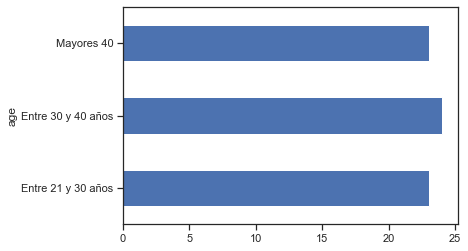

In [7]:
ages_group = df.groupby("age")
ages = ages_group["age"].count()
ages.plot.barh()

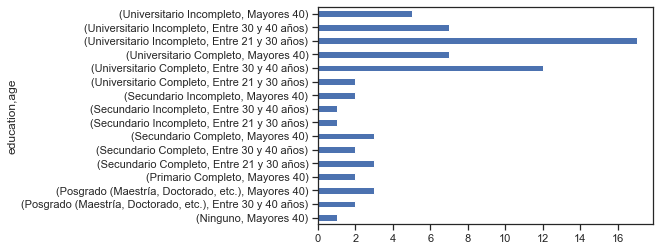

In [43]:
age_edutacion_area = df[["age", "education", "area"]].dropna()
age_edutacion_area.groupby(["education", "age"]).size().plot.barh()

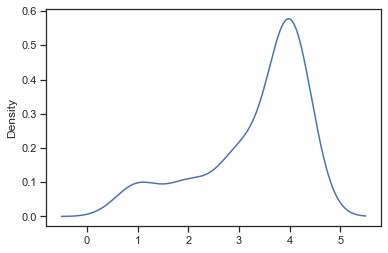

In [9]:
df["app_use"].plot.density()

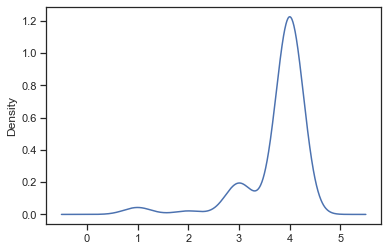

In [10]:
df["easy_information"].plot.density()

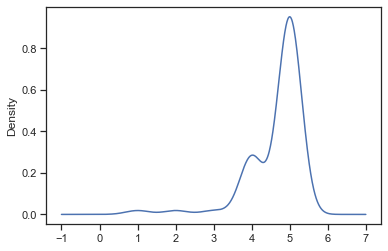

In [11]:
df["comprehensible"].plot.density()

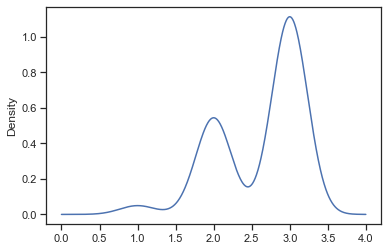

In [14]:
df["navigation"].plot.density()

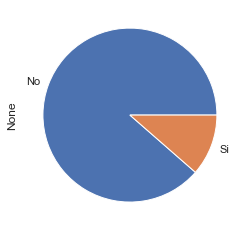

In [15]:
df.groupby("order_navigation").size().plot.pie()

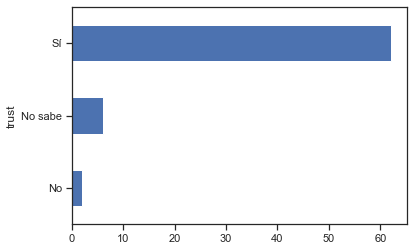

In [16]:
df.groupby("trust").size().plot.barh()

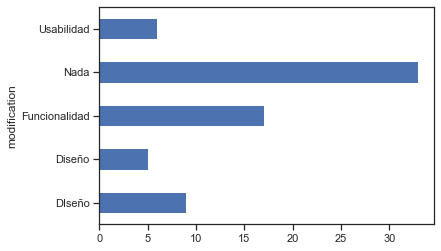

In [17]:
df.groupby("modification").size().plot.barh()

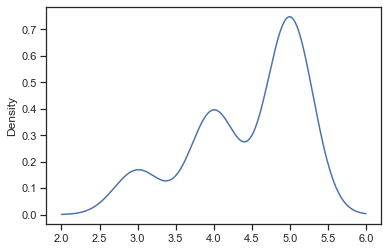

In [18]:
df["custom"].plot.density()

- Por edades, personas que no sean de tecnología que les parezca segura la app
- Queremos ver para las personas que son de rubros que no son de sistemas, si confiarían en una app así.

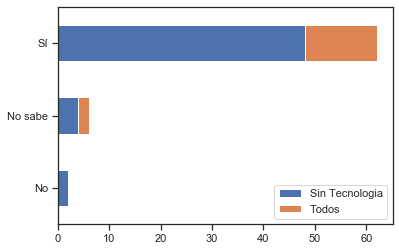

In [19]:
col1 = df[df["area"] != "Tecnología"].groupby("trust").size()
col2 = df[df["area"] == "Tecnología"].groupby("trust").size()
pd.DataFrame({
    "Sin Tecnologia": col1, "Todos": col2
}).plot.barh(stacked=True)

- Por edades y por nivel, pesonas que no sean de tecnología que les parezca facil de usar.
- Para personas que son de otros rubros qué tan facil les parece según su nivel de estudios.

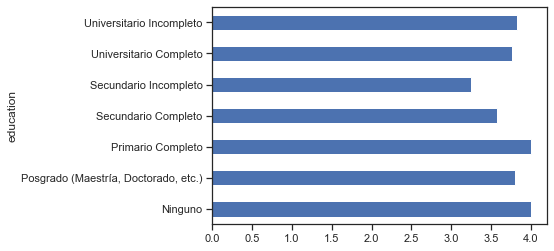

In [20]:
df.groupby(["education"])["easy_information"].describe()["mean"].plot.barh()

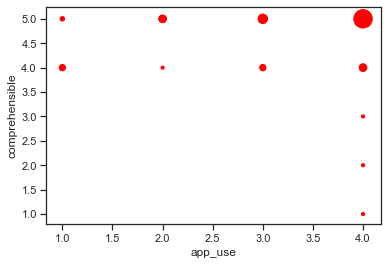

In [21]:
app_use = df.groupby(["app_use","comprehensible"]).size()
app_use = app_use.reset_index(level=[0,1])
app_use.columns = ["app_use", "comprehensible", "size"]
app_use.plot.scatter(x="app_use", y="comprehensible", color="red", s=app_use["size"] * 10)

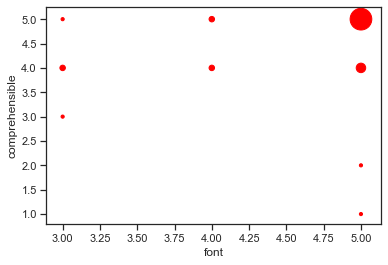

In [23]:
font = df.groupby(["font","comprehensible"]).size()
font = font.reset_index(level=[0,1])
font.columns = ["font", "comprehensible", "size"]
font.plot.scatter(x="font", y="comprehensible", color="red", s=font["size"] * 10)

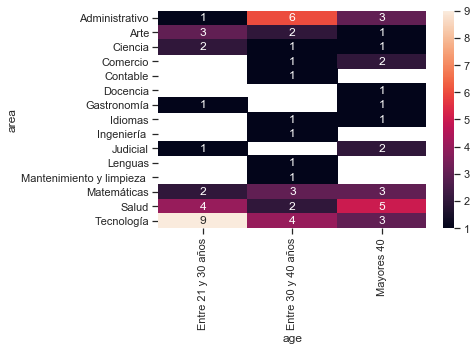

In [41]:
area_age = df.groupby(["area", "age"]).size()
area_age = area_age.reset_index(level=[0,1])
area_age.columns = ["area", "age", "size"]
result = area_age.pivot(index='area', columns='age', values='size')
sns.heatmap(result, annot=True, fmt="g")
plt.show()

In [ ]:
Por edades y profesion,
 Para generar un pedido tuvo que navegar varias veces por la misma pantalla? AGE, EDUCATION, NAVIGATION


In [ ]:
Info de forma clara, por edad y profesion. AGE, EDUCATION, comprehensible

# Resultados Entrevista

In [57]:
df = pd.read_csv("interviews.csv")
df["use_delivery2"] = df.apply(lambda row: (True,False)[row.use_delivery == "si"], axis=1)
df["winner"] = df.apply(lambda row: ("paper","app")[row.paper_time > row.app_time], axis=1)
df

,age,profession,order,paper_time,app_time,frecuency,use_delivery,use_restaurant,worst_moment,time,...,intuition,would_use,recommend,easy,remove_paper,doubts,benefits,waiter,use_delivery2,winner
0,27,Sistemas,CA,40,60,Dos veces por mes,si,no,Pagar,10,...,5,si,5,No sabe,no,si,Menos costo,no,False,paper
1,45,Sistemas,AC,95,150,Dos veces por mes,no,no,Esperar el pedido,10,...,4,si,4,Aplicación,no,si,Rapidez,no,True,paper
2,55,Comerciante,CA,133,80,Una por mes,si,no,Esperar el pedido,10,...,5,no,1,Aplicación,no,no,Ninguno,si,False,app
3,50,Comerciante,AC,60,80,Una por mes,no,no,Esperar el pedido,5,...,4,no,4,No sabe,no,si,Rapidez,si,True,paper
4,25,Deporte,AC,55,70,Más de 4 veces,si,si,Esperar el pedido,10,...,5,si,5,Carta,no,no,Rapidez,no,False,paper
5,55,Arquitectura,AC,80,157,Más de 4 veces,no,si,Esperar el pedido,0,...,3,si,3,Aplicación,si,si,Rapidez,no,True,paper
6,46,Docencia,CA,120,80,Dos veces por mes,no,no,Salir de casa,0,...,3,no,3,Carta,no,si,Rapidez,si,True,app
7,27,Industria,CA,120,60,Una por mes,si,no,Esperar el pedido,15,...,5,si,4,Carta,no,no,Ninguno,no,False,app
8,25,Docencia,CA,180,120,Más de 4 veces,si,no,Esperar el pedido,10,...,5,si,5,Aplicación,no,no,Ninguno,no,False,app
9,30,Industria,AC,65,52,Dos veces por mes,si,no,Pagar,15,...,4,si,5,Carta,si,no,Rapidez,no,False,app


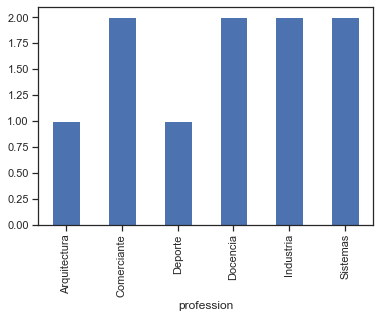

In [4]:
df.groupby("profession").size().plot.bar()

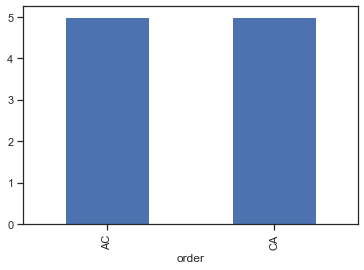

In [5]:
df.groupby("order").size().plot.bar()

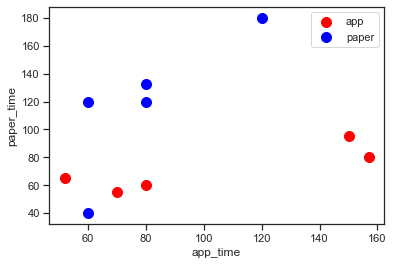

In [59]:
app = df[df["order"] == "AC"]
paper = df[df["order"] == "CA"]
ax = app.plot.scatter(x="app_time", y="paper_time", color="red", label="app", s=100)
paper.plot.scatter(x="app_time", y="paper_time", color="blue", label="paper", s=100, ax=ax)

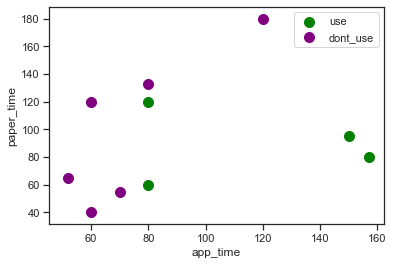

In [20]:
use = df[df["use_delivery2"] == True]
no_use = df[df["use_delivery2"] == False]
ax = use.plot.scatter(x="app_time", y="paper_time", color="green", label="use", s=100)
no_use.plot.scatter(x="app_time", y="paper_time", color="purple", label="dont_use", s=100, ax=ax)

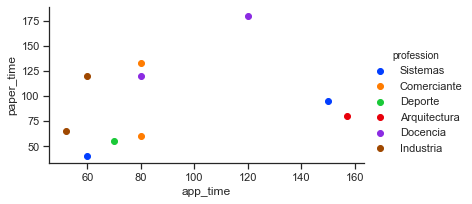

In [7]:
fg = sns.FacetGrid(data=df, hue='profession', palette="bright", aspect=1.8)
fg.map(pyplot.scatter, 'app_time', 'paper_time').add_legend()

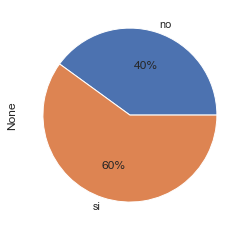

In [180]:
df.groupby("use_delivery").size().plot.pie(autopct='%d%%')

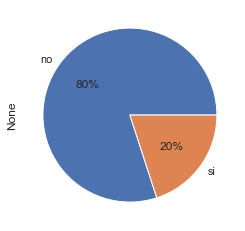

In [181]:
df.groupby("use_restaurant").size().plot.pie(autopct='%d%%')

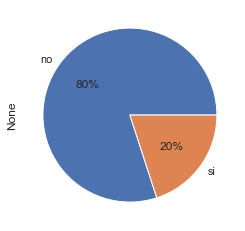

In [182]:
df.groupby("remove_paper").size().plot.pie(autopct='%d%%')

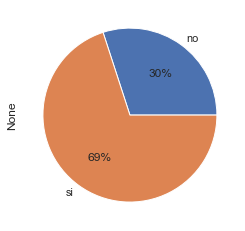

In [184]:
df.groupby("would_use").size().plot.pie(autopct='%d%%')

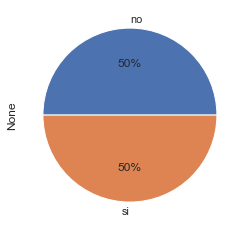

In [21]:
df.groupby("doubts").size().plot.pie(autopct='%d%%')

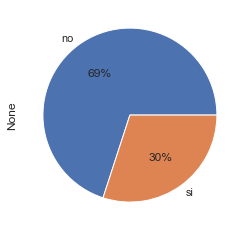

In [22]:
df.groupby("waiter").size().plot.pie(autopct='%d%%')

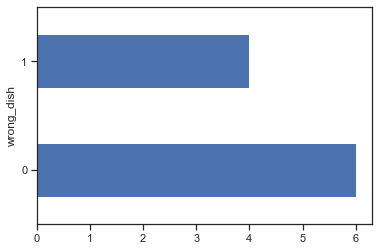

In [193]:
df.groupby("wrong_dish").size().plot.barh()

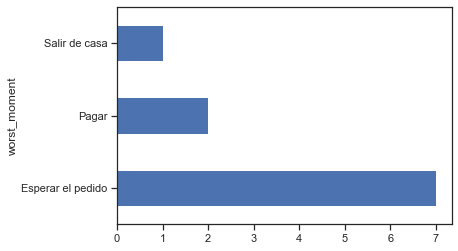

In [187]:
df.groupby("worst_moment").size().plot.barh()

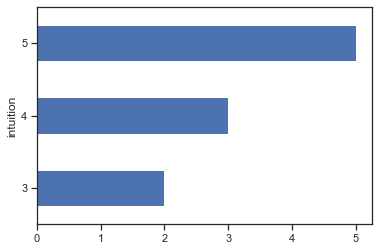

In [188]:
df.groupby("intuition").size().plot.barh()

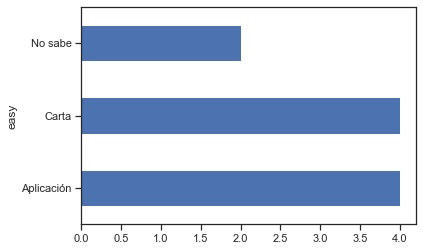

In [194]:
df.groupby("easy").size().plot.barh()

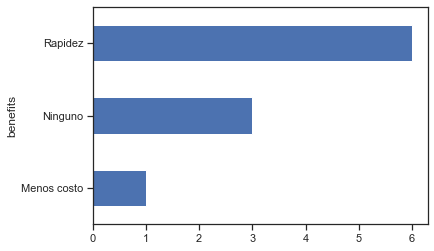

In [23]:
df.groupby("benefits").size().plot.barh()

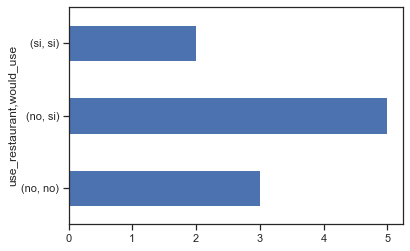

In [218]:
df.groupby(["use_delivery","would_use"]).size().plot.barh()

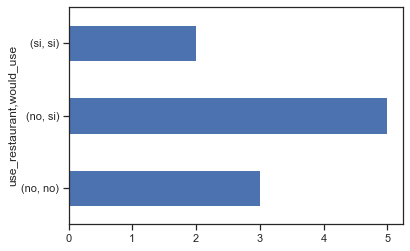

In [219]:
df.groupby(["use_restaurant","would_use"]).size().plot.barh()